<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>

<h2>INCLUSIVE YEAR 2019-2022</h2>

<H3>Analyst : Randel Jonh Lontok</H3>
<hr>

<h2>Data Preparation</h2>

<h3>Importing Libraries</h3>

<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h2>Data Frame</h2>
<hr>

In [2]:
accident = pd.read_csv('datasets//accident_data.csv')

<h3>Data Cleansing</h3>

<hr>

In [3]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [4]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

<h2>Categorical Data Fields</h2>

<hr>

In [5]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [6]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Number_of_Casualties'] = accident['Number_of_Casualties'].astype('int')
accident['Number_of_Vehicles'] = accident['Number_of_Vehicles'].astype('int')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

<h3>Converting Data Field into DATE TIME data type</h3>

In [7]:
# accident['Accident Date'] = accident['Accident Date'].astype('str')
#remove spaces 20 / 02 / 2025
accident['Accident Date'] = accident['Accident Date'].str.strip()
#replace / with -
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [8]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [9]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = "coerce")

In [10]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [11]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Monthly'] = accident['Accident Date'].dt.month
accident['day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [12]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Monthly,day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [13]:
accident['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [14]:
df_2020 = accident[accident['Year'] == 2020]
df_2020['Number_of_Casualties'].count()

np.int64(170591)

<h1>Insight No.1</h1>

<h2>Out of the 15 Vehicle Types Car has the most casualties with 75% (127894) of 2020 recorded.Car accidents is most likely to have more casualties than other of  vehicle types.</h2>

In [15]:
casualty_2020 = df_2020.groupby(['Vehicle_Type'])['Number_of_Casualties'].count()

In [16]:
casualty_2020

Vehicle_Type
Agricultural vehicle                        562
Bus or coach (17 or more pass seats)       6709
Car                                      127894
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over              4528
Goods over 3.5t. and under 7.5t            1545
Minibus (8 - 16 passenger seats)            530
Motorcycle 125cc and under                 4104
Motorcycle 50cc and under                  1764
Motorcycle over 125cc and up to 500cc      1925
Motorcycle over 500cc                      6745
Other vehicle                              1533
Pedal cycle                                  63
Ridden horse                                  0
Taxi/Private hire car                      3521
Van / Goods 3.5 tonnes mgw or under        9162
Name: Number_of_Casualties, dtype: int64

In [17]:
dv_1 = df_2020.groupby(['Vehicle_Type'])['Number_of_Casualties'].count()

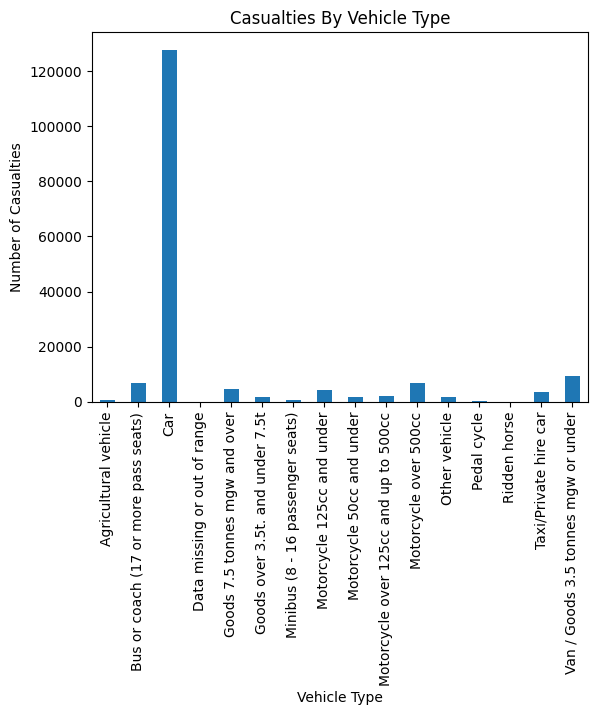

In [18]:
dv_1.plot(kind='bar')
plt.title('Casualties By Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Casualties')
plt.show()

<h1>Insight No.2</h1>

<h2>The number of 2020 Car casualties in a Single Carriage way is 75%(94884).Car accidents most likely to happen in a single carriage way.</h2>

In [19]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

In [20]:
df_exam = accident.groupby(['Road_Type'])['Number_of_Vehicles'].count()

In [21]:
df_exam_roadtype = df_2020[df_2020['Road_Type'] == 'Single carriageway']

In [22]:
df_exam_roadtype1 = df_exam_roadtype.groupby(['Vehicle_Type'])['Number_of_Casualties'].count()

In [23]:
df_exam_roadtype1

Vehicle_Type
Agricultural vehicle                       415
Bus or coach (17 or more pass seats)      4968
Car                                      94884
Data missing or out of range                 5
Goods 7.5 tonnes mgw and over             3409
Goods over 3.5t. and under 7.5t           1149
Minibus (8 - 16 passenger seats)           396
Motorcycle 125cc and under                3097
Motorcycle 50cc and under                 1353
Motorcycle over 125cc and up to 500cc     1432
Motorcycle over 500cc                     4954
Other vehicle                             1137
Pedal cycle                                 42
Ridden horse                                 0
Taxi/Private hire car                     2638
Van / Goods 3.5 tonnes mgw or under       6754
Name: Number_of_Casualties, dtype: int64

In [24]:
accident.groupby(['Vehicle_Type','Road_Type'])['Number_of_Casualties'].count().unstack()

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,unaccounted
Vehicle_Type,,,,,,
Agricultural vehicle,293,49,129,1436,27,13
Bus or coach (17 or more pass seats),4043,546,1704,19090,285,210
Car,74820,10223,33187,371028,5298,3436
Data missing or out of range,1,0,0,5,0,0
Goods 7.5 tonnes mgw and over,2631,341,1110,12915,188,122
Goods over 3.5t. and under 7.5t,959,116,422,4498,58,43
Minibus (8 - 16 passenger seats),275,40,138,1493,16,14
Motorcycle 125cc and under,2228,307,991,11507,147,89
Motorcycle 50cc and under,1085,133,512,5743,89,41


In [25]:
road_2020 = df_2020[df_2020['Road_Type'] == 'Single carriageway']

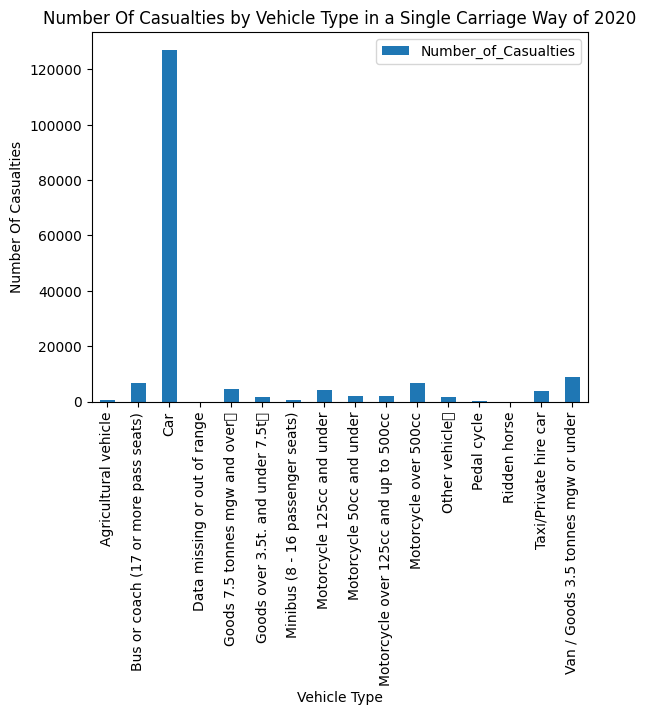

,Vehicle_Type,Number_of_Casualties
Agricultural vehicle,Agricultural vehicle,532
Bus or coach (17 or more pass seats),Bus or coach (17 or more pass seats),6762
Car,Car,127107
Data missing or out of range,Data missing or out of range,8
Goods 7.5 tonnes mgw and over\t,Goods 7.5 tonnes mgw and over,4549
Goods over 3.5t. and under 7.5t\t,Goods over 3.5t. and under 7.5t,1571
Minibus (8 - 16 passenger seats),Minibus (8 - 16 passenger seats),537
Motorcycle 125cc and under,Motorcycle 125cc and under,4109
Motorcycle 50cc and under,Motorcycle 50cc and under,1844
Motorcycle over 125cc and up to 500cc,Motorcycle over 125cc and up to 500cc,1887


In [26]:
dv_2 = road_2020.groupby(['Vehicle_Type'])['Number_of_Casualties'].sum().reset_index()

vehicle_type = {
    0:"Agricultural vehicle",1:"Bus or coach (17 or more pass seats)",2:"Car",3:"Data missing or out of range",4:"Goods 7.5 tonnes mgw and over	",
    5:"Goods over 3.5t. and under 7.5t	",6:"Minibus (8 - 16 passenger seats)",7:"Motorcycle 125cc and under",8:"Motorcycle 50cc and under"
    ,9:"Motorcycle over 125cc and up to 500cc",10:"Motorcycle over 500cc",11:"Other vehicle	",12:"Pedal cycle",13:"Ridden horse",14:"Taxi/Private hire car",
    15:"Van / Goods 3.5 tonnes mgw or under"
}

dv_2.index = dv_2.index.map(vehicle_type)
dv_2.plot(kind='bar')
plt.title('Number Of Casualties by Vehicle Type in a Single Carriage Way of 2020')
plt.xlabel('Vehicle Type')
plt.ylabel('Number Of Casualties')
plt.show()

dv_2



<h1>Insight No.3</h1>

<h2>The Lowest Vehicle Type Casualties is Pedal with 0.04%(6)</h2>

In [27]:
df_january_2020 = accident[(accident['Monthly'] == 1) & (accident['Year'] == 2020)]

In [28]:
df_january_2020.groupby(['Vehicle_Type'])['Number_of_Casualties'].count()

Vehicle_Type
Agricultural vehicle                        40
Bus or coach (17 or more pass seats)       629
Car                                      10606
Data missing or out of range                 0
Goods 7.5 tonnes mgw and over              382
Goods over 3.5t. and under 7.5t            135
Minibus (8 - 16 passenger seats)            34
Motorcycle 125cc and under                 318
Motorcycle 50cc and under                  137
Motorcycle over 125cc and up to 500cc      146
Motorcycle over 500cc                      565
Other vehicle                              103
Pedal cycle                                  6
Ridden horse                                 0
Taxi/Private hire car                      283
Van / Goods 3.5 tonnes mgw or under        749
Name: Number_of_Casualties, dtype: int64

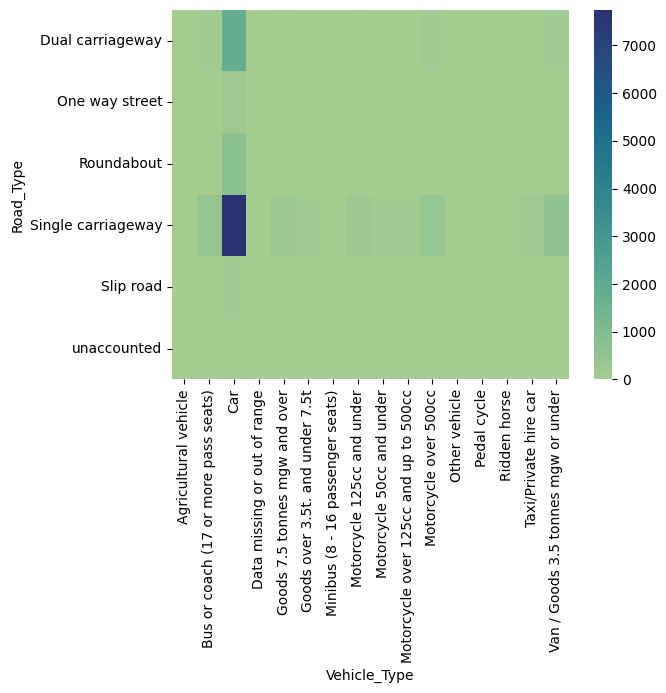

In [29]:
surface_vehicle = df_january_2020.groupby(['Road_Type','Vehicle_Type']).size().unstack()

sns.heatmap(surface_vehicle,cmap="crest")
plt.show()

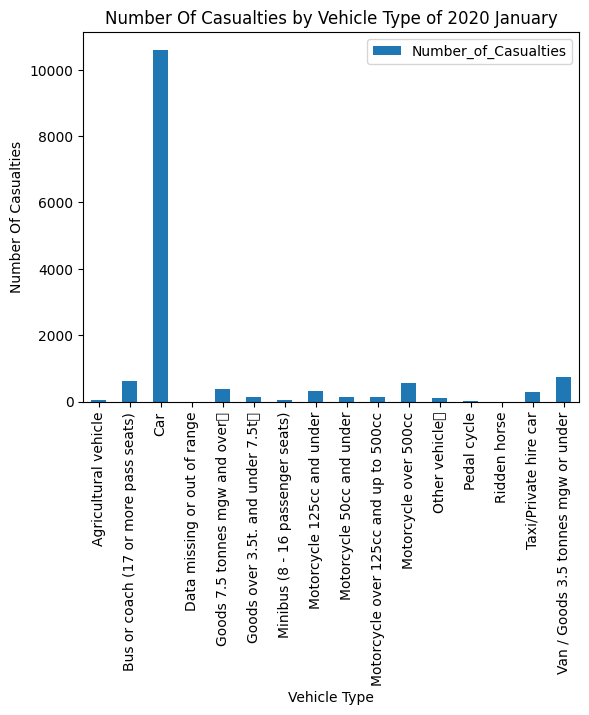

,Vehicle_Type,Number_of_Casualties
Agricultural vehicle,Agricultural vehicle,40
Bus or coach (17 or more pass seats),Bus or coach (17 or more pass seats),629
Car,Car,10606
Data missing or out of range,Data missing or out of range,0
Goods 7.5 tonnes mgw and over\t,Goods 7.5 tonnes mgw and over,382
Goods over 3.5t. and under 7.5t\t,Goods over 3.5t. and under 7.5t,135
Minibus (8 - 16 passenger seats),Minibus (8 - 16 passenger seats),34
Motorcycle 125cc and under,Motorcycle 125cc and under,318
Motorcycle 50cc and under,Motorcycle 50cc and under,137
Motorcycle over 125cc and up to 500cc,Motorcycle over 125cc and up to 500cc,146


In [30]:
dv_3 = df_january_2020.groupby(['Vehicle_Type'])['Number_of_Casualties'].size().reset_index()

vehicle_type = {
    0:"Agricultural vehicle",1:"Bus or coach (17 or more pass seats)",2:"Car",3:"Data missing or out of range",4:"Goods 7.5 tonnes mgw and over	",
    5:"Goods over 3.5t. and under 7.5t	",6:"Minibus (8 - 16 passenger seats)",7:"Motorcycle 125cc and under",8:"Motorcycle 50cc and under"
    ,9:"Motorcycle over 125cc and up to 500cc",10:"Motorcycle over 500cc",11:"Other vehicle	",12:"Pedal cycle",13:"Ridden horse",14:"Taxi/Private hire car",
    15:"Van / Goods 3.5 tonnes mgw or under"
}

dv_3.index = dv_3.index.map(vehicle_type)
dv_3.plot(kind='bar')
plt.title('Number Of Casualties by Vehicle Type of 2020 January')
plt.xlabel('Vehicle Type')
plt.ylabel('Number Of Casualties')
plt.show()

dv_3


<h1>Insight No.4</h1>

<h2>The highest Casualties for January is Car with 75%(10606)</h2>

<h1>Insight No.5</h1>

<h2>The Second Highest Casualties for January is Van / Goods 3.5 tonnes mgw or under with 5%(749)</h2>

<h1>Insight No.6</h1>

<h2>Car Mostly likely to get more Casualties than the other vehicle type in January</h2>

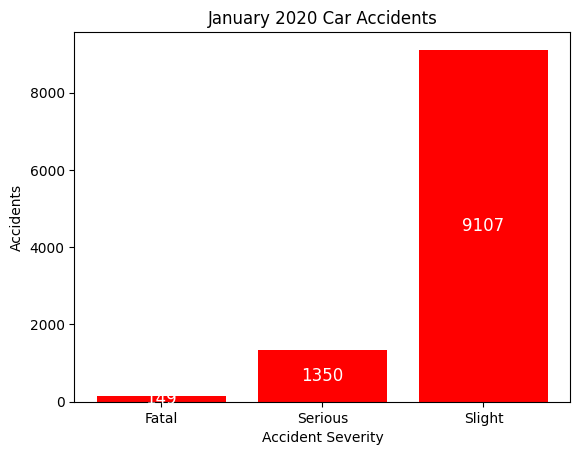

In [41]:


df_car = df_january_2020[df_january_2020['Vehicle_Type'] == 'Car']

# Group by 'Accident_Severity' and count accidents
df_visual = df_car.groupby(['Accident_Severity']).size().reset_index(name='Accident_Count')

# Plot the bar chart
fig, ax = plt.subplots()
bars = ax.bar(df_visual['Accident_Severity'], df_visual['Accident_Count'], color='red')

# Add count labels inside the bars
ax.bar_label(bars, label_type='center', color='white', fontsize=12)

# Title and labels
plt.title('January 2020 Car Accidents')
plt.ylabel('Accidents')
plt.xlabel('Accident Severity')

plt.show()

<h1>Insight No.7</h1>

<h2>Most Accidents Are Minor – The majority of car accidents in the UK from January 2020 resulted in slight severity, accounting for 86% (9,107 accidents). This suggests that while collisions are frequent, most do not lead to severe injuries.</h2>

<h1>Insight No.8</h1>

<h2>Serious Accidents Are Less Common but Significant – 13% (1,350 accidents) were classified as serious severity, indicating a notable number of incidents where injuries were more severe, requiring medical attention or hospitalization.</h2>

<h1>Insight No.9</h1>

<h2>Fatal Accidents Are Rare but Impactful – Fatal accidents accounted for only 1.4% (149 accidents), highlighting that while rare, these incidents have the most severe consequences, emphasizing the need for continuous road safety measures.</h2>

In [ ]:
df_february_2020 = accident[(accident['Monthly'] == 2) & (accident['Year'] == 2020)]

In [ ]:
df_test1 = df_february_2020.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].size().unstack()

In [ ]:
df_visual1 = df_february_2020.groupby(['Vehicle_Type','Accident_Severity']).size().reset_index(name='Accident_Count')

plt.bar(df_visual1['Accident_Severity'],df_visual['Accident_Count'])
plt.show()

<h1>Insight No.10</h1>

<h2>February 2020</h2>
<h2>Most Accidents Were Minor – Slight severity accidents made up 85.7% (9,200 accidents), reinforcing the trend that most collisions result in minor injuries or damage.</h2>

<h1>Insight No.11</h1>

<h2>February 2020</h2>
<h2>Serious Accidents Remained Notable – 13.5% (1,447 accidents) were categorized as serious severity, indicating a significant number of cases with severe injuries requiring medical intervention.</h2>

<h1>Insight No.12</h1>

<h2>February 2020</h2>
<h2>Fatal Accidents Were Less Than 1.3% – 129 accidents (1.2%) resulted in fatalities, showing that while deadly crashes are rare, they still pose a critical concern for road safety improvements.</h2>

In [ ]:
df_test2 = (
    df_february_2020.groupby(['Vehicle_Type', 'Accident_Severity'])['Number_of_Casualties'].count(),
    df_january_2020.groupby(['Vehicle_Type', 'Accident_Severity'])['Number_of_Casualties'].count()
)

In [ ]:
df_visual1 = df_february_2020.groupby(['Vehicle_Type','Accident_Severity']).size().reset_index(name='Accident_Count')

plt.bar(df_visual1['Accident_Severity'],df_visual['Accident_Count'])
plt.title('February 2020 Car Accidents')
plt.show()


df_visual = df_january_2020.groupby(['Vehicle_Type','Accident_Severity']).size().reset_index(name='Accident_Count')

plt.bar(df_visual['Accident_Severity'],df_visual['Accident_Count'])
plt.title('January 2020 Car Accidents')
plt.show()

<h1>Insight No.13</h1>

<h2>Slight Severity Accidents Increased Slightly – In January 2020, there were 9,107 slight accidents, which increased to 9,200 in February, a 1% rise. This suggests a consistent trend of minor collisions.</h2>

<h1>Insight No.14</h1>

<h2>Serious Accidents Rose in February – Serious severity accidents increased from 1,350 in January to 1,447 in February, a 7.2% rise. This could indicate worsening road conditions, increased traffic, or other contributing factors.</h2>

<h1>Insight No.15</h1>

<h2>Fatal Accidents Decreased Slightly – Fatal accidents dropped from 149 in January to 129 in February, a 13.4% decrease.</h2>

In [ ]:
df_january_2021 = accident[(accident['Monthly'] == 1) & (accident['Year'] == 2021)]

In [ ]:
df_test3 = df_january_2021.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].count()

In [ ]:
df_visual3 = df_january_2021.groupby(['Vehicle_Type','Accident_Severity']).size().reset_index(name='Accident_Count')

plt.bar(df_visual3['Accident_Severity'],df_visual['Accident_Count'])
plt.title('January 2021 Car Accidents')
plt.show()

<h1>Insight No.16</h1>

<h2>Slight Severity Accidents Remain the Majority – 9,016 accidents (85.6%) were classified as slight severity, continuing the trend of minor collisions being the most frequent.</h2>

<h1>Insight No.17</h1>

<h2>Serious Accidents Slightly Increased – 1,357 accidents (12.9%) were classified as serious severity, indicating a small decrease compared to January 2020 (1,350 serious accidents, 13%).</h2>

<h1>Insight No.18</h1>

<h2>Fatal Accidents Remain the Same – 149 fatal accidents (1.4%) occurred in January 2021, the same as in January 2020, highlighting that fatal accident rates remained consistent despite changes in traffic patterns or regulations.</h2>

In [ ]:
df_february_2021 = accident[(accident['Monthly'] == 2) & (accident['Year'] == 2021)]

In [ ]:
df_test4 = df_february_2021.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].count()

In [ ]:
df_visual4 = df_february_2021.groupby(['Vehicle_Type','Accident_Severity']).size().reset_index(name='Accident_Count')

plt.bar(df_visual4['Accident_Severity'],df_visual['Accident_Count'])
plt.title('February 2021 Car Accidents')
plt.show()

<h1>Insight No.19</h1>

<h2>Slight Accidents Remain the Majority but Decreased – 7,325 accidents (85.8%) were classified as slight severity, showing a notable decrease from February 2020 (9,200 slight accidents, 85.7%).</h2>

<h1>Insight No.20</h1>

<h2>Serious Accidents Dropped Significantly – 1,077 accidents (12.6%) were classified as serious severity, marking a 25.6% decrease from February 2020 (1,447 serious accidents, 13.5%).</h2>

<h1>Insight No.21</h1>

<h2>Fewer Fatal Accidents – 122 fatal accidents (1.4%) occurred, which is 5.4% lower than February 2020 (129 fatal accidents, 1.2%), suggesting a slight improvement in road safety.</h2>

<h1>Fatal accidents showed a smaller decline but remained a concern for road safety.</h1>